# <p style="background-color:darkviolet;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Regularizasyon_Ridge_Lasso_ElasticNet, Scale, Cross Validation, Gridsearch </b></p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [139]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [1]:
X = df.drop("sales", axis=1)
y = df["sales"]

NameError: name 'df' is not defined

## Polynomial Conversion


In [141]:
from sklearn.preprocessing import PolynomialFeatures

In [142]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [143]:
poly_features.shape

(200, 55)

In [148]:
sample = pd.DataFrame(poly_features)
sample.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888,2.803280e+09,4.605127e+08,8.430551e+08,7.565138e+07,1.384941e+08,2.535394e+08,1.242774e+07,2.275131e+07,4.165054e+07,7.624913e+07,2.041584e+06,3.737503e+06,6.842200e+06,1.252593e+07,2.293107e+07,6.450347e+11,1.059640e+11,1.939870e+11,1.740738e+10,3.186748e+10,5.833941e+10,2.859622e+09,5.235075e+09,9.583789e+09,1.754493e+10,4.697684e+08,8.599993e+08,1.574390e+09,2.882217e+09,5.276440e+09,7.717187e+07,1.412776e+08,2.586352e+08,4.734803e+08,8.667946e+08,1.586830e+09
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851,3.921390e+06,3.463160e+06,3.974263e+06,3.058476e+06,3.509855e+06,4.027848e+06,2.701081e+06,3.099714e+06,3.557178e+06,4.082156e+06,2.385449e+06,2.737500e+06,3.141508e+06,3.605140e+06,4.137197e+06,1.745019e+08,1.541106e+08,1.768547e+08,1.361022e+08,1.561885e+08,1.792392e+08,1.201981e+08,1.379373e+08,1.582944e+08,1.816560e+08,1.061525e+08,1.218188e+08,1.397971e+08,1.604287e+08,1.841053e+08,9.374816e+07,1.075838e+08,1.234613e+08,1.416820e+08,1.625918e+08,1.865876e+08
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557,8.752131e+04,2.335598e+05,3.526294e+05,6.232787e+05,9.410286e+05,1.420769e+06,1.663284e+06,2.511233e+06,3.791470e+06,5.724376e+06,4.438648e+06,6.701489e+06,1.011793e+07,1.527610e+07,2.306391e+07,1.505366e+06,4.017228e+06,6.065226e+06,1.072039e+07,1.618569e+07,2.443722e+07,2.860849e+07,4.319321e+07,6.521328e+07,9.845927e+07,7.634475e+07,1.152656e+08,1.740285e+08,2.627489e+08,3.966993e+08,2.037340e+08,3.075983e+08,4.644132e+08,7.011728e+08,1.058633e+09,1.598329e+09
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625,5.268058e+08,1.436111e+08,2.034201e+08,3.914942e+07,5.545378e+07,7.854834e+07,1.067242e+07,1.511710e+07,2.141285e+07,3.033055e+07,2.909378e+06,4.121032e+06,5.837298e+06,8.268327e+06,1.171180e+07,7.981108e+10,2.175708e+10,3.081814e+10,5.931138e+09,8.401248e+09,1.190007e+10,1.616871e+09,2.290241e+09,3.244046e+09,4.595078e+09,4.407708e+08,6.243364e+08,8.843506e+08,1.252652e+09,1.774337e+09,1.201573e+08,1.701986e+08,2.410804e+08,3.414819e+08,4.836971e+08,6.851400e+08
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704,1.068547e+09,6.382915e+07,3.451502e+08,3.812803e+06,2.061738e+07,1.114866e+08,2.277559e+05,1.231569e+06,6.659596e+06,3.601115e+07,1.360489e+04,7.356718e+04,3.978077e+05,2.151108e+06,1.163192e+07,1.931933e+11,1.154031e+10,6.240316e+10,6.893548e+08,3.727622e+09,2.015677e+10,4.117827e+07,2.226677e+08,1.204055e+09,6.510816e+09,2.459764e+06,1.330095e+07,7.192364e+07,3.889204e+08,2.103051e+09,1.469328e+05,7.945256e+05,4.296323e+06,2.323197e+07,1.256247e+08,6.793041e+08


## Train | Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
scaler = StandardScaler()

# Model Fit & Scale


In [11]:
scaler.fit(X_train)

#scaler.fit_transform(X_train) Ayrı ayrı yerine bu şekilde kullanımı önerilir

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [14]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round().T

,mean,std
0,-0.0,1.0
1,-0.0,1.0
2,-0.0,1.0
3,-0.0,1.0
4,-0.0,1.0
5,-0.0,1.0
6,-0.0,1.0
7,-0.0,1.0
8,-0.0,1.0
9,-0.0,1.0


# Linear Regression

şimdi scale edilmiş data üzerinden lineear modelimi seçip tekrardan modele sokuyorum.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [21]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


# Multicollinearity Analizi ve VIF (Variance Inflation Factor)


```python
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# VIF hesaplamak için DataFrame'i çağırın
vif_result = calculate_vif(X)

# VIF sonuçlarını görüntüleme
print(vif_result)


In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

# VIF hesaplamak için DataFrame'i çağırın
vif_result = calculate_vif(X)

# VIF sonuçlarını görüntüleme
print(vif_result)

     Feature       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


In [23]:
def color_red(val):
   
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'black'
    return f'color: {color}'

In [24]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [25]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jacca

In [28]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
RocCurveDisplay
SCORERS
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_distances_reduction
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_absolute_error_score
d2_pinball_score
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
get_scorer_names
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_loss
log_loss
make_scorer
matthews_corrcoe

In [29]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [30]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.008594,0.003542,0.367902,-1.271247,-19.204259,-4.382266
2,0.008531,0.002012,0.879658,-0.710463,-2.713292,-1.647207
3,0.004983,0.002540,0.977560,-0.395033,-0.622901,-0.789240
4,0.005990,0.004521,0.989369,-0.418977,-0.289361,-0.537923
5,0.005989,0.002508,0.166596,-1.474093,-15.409856,-3.925539


In [31]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

,cv_fit_time,cv_score_time,cv_test_r2,cv_test_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_test_neg_root_mean_squared_error
1,0.008594,0.003542,0.367902,-1.271247,-19.204259,-4.382266
2,0.008531,0.002012,0.879658,-0.710463,-2.713292,-1.647207
3,0.004983,0.002540,0.977560,-0.395033,-0.622901,-0.789240
4,0.005990,0.004521,0.989369,-0.418977,-0.289361,-0.537923
5,0.005989,0.002508,0.166596,-1.474093,-15.409856,-3.925539


In [32]:
cv_df.iloc[:, 2:].mean()

cv_test_r2                             0.676217
cv_test_neg_mean_absolute_error       -0.853963
cv_test_neg_mean_squared_error        -7.647934
cv_test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [33]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


In [34]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [35]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


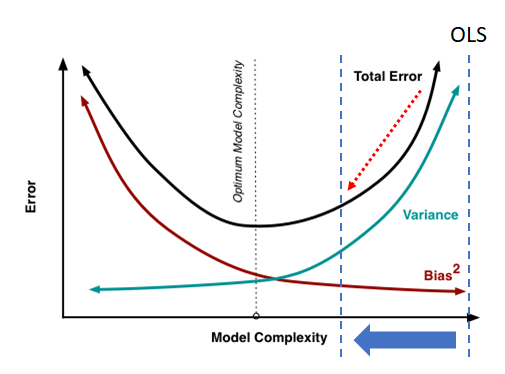

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [38]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [39]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [40]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [41]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


##  For Ridge Regression CV with alpha : 1

### Model Sıfırlama (Resetting the Model)


In [42]:
model = Ridge(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [43]:
pd.DataFrame(scores, index=range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002983,0.002560,0.988913,-0.405789,-0.336840,-0.580379
2,0.002998,0.002992,0.969951,-0.551469,-0.677493,-0.823099
3,0.002508,0.002997,0.950978,-0.552320,-1.360795,-1.166531
4,0.001996,0.004598,0.991259,-0.365106,-0.237919,-0.487769
5,0.001995,0.002990,0.986854,-0.343011,-0.243072,-0.493023


In [44]:
cvr_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cvr_")
cvr_df

,cvr_fit_time,cvr_score_time,cvr_test_r2,cvr_test_neg_mean_absolute_error,cvr_test_neg_mean_squared_error,cvr_test_neg_root_mean_squared_error
1,0.002983,0.002560,0.988913,-0.405789,-0.336840,-0.580379
2,0.002998,0.002992,0.969951,-0.551469,-0.677493,-0.823099
3,0.002508,0.002997,0.950978,-0.552320,-1.360795,-1.166531
4,0.001996,0.004598,0.991259,-0.365106,-0.237919,-0.487769
5,0.001995,0.002990,0.986854,-0.343011,-0.243072,-0.493023


**SKOR ÇOK GÜZELLEŞTİ**

In [45]:
cvr_df.iloc[:, 2:].mean()

cvr_test_r2                             0.977591
cvr_test_neg_mean_absolute_error       -0.443539
cvr_test_neg_mean_squared_error        -0.571224
cvr_test_neg_root_mean_squared_error   -0.710160
dtype: float64

In [46]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

In [47]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


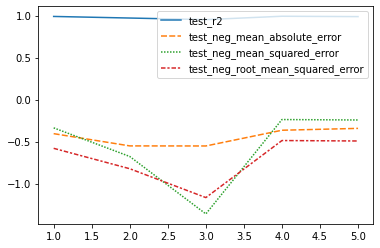

In [48]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

In [49]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [50]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [51]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


In [52]:
from sklearn.linear_model import RidgeCV

In [53]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [54]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 5, scoring = "neg_root_mean_squared_error")

In [55]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [56]:
ridge_cv_model.alpha_

0.02

In [57]:
ridge_cv_model.best_score_

-0.6530406519552931

In [58]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [59]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "rigde_cv")
rcs

,rigde_cv_train,rigde_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [60]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [61]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460874e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [62]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_0.02"])

In [63]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


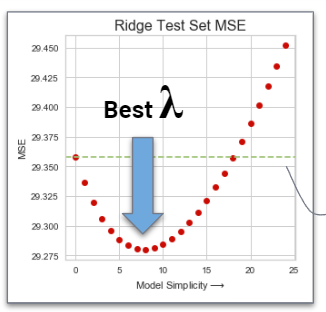

## Lasso Regresyonu



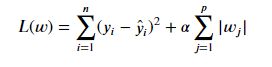

In [64]:
from sklearn.linear_model import Lasso, LassoCV

In [65]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [66]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [67]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [68]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


### For Lasso CV with Default Alpha : 1

şimdi buradada tekrar modeli sıfırlıyoruz. Sıfırlama yaparken yukarıda yazdığımız aynı parametreleri yazacağız.unutmayın

In [69]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [70]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004985,0.003543,0.924246,-1.155268,-2.301550,-1.517086
2,0.003311,0.002993,0.955624,-0.656358,-1.000530,-1.000265
3,0.004569,0.001998,0.888327,-1.072936,-3.099952,-1.760668
4,0.001992,0.003503,0.896199,-1.255165,-2.825429,-1.680901
5,0.002998,0.004020,0.903545,-1.056538,-1.783470,-1.335466


In [71]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:].mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [72]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


<AxesSubplot:>

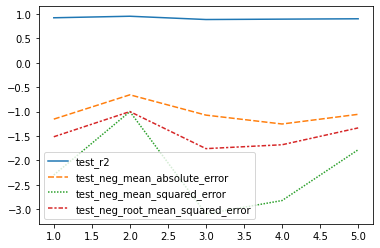

In [73]:
sns.lineplot(data=scores.iloc[:,2:])

Şimdi bakalım elimizdeki katsayılara ve featurelerimizin durumuna 2 tane feature kalmış.

In [74]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [75]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["losso_coef_alpha_1"])

In [76]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,losso_coef_alpha_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


## Choosing best alpha value with Cross Validation (CV) (Lasso)


In [77]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 5,  max_iter=10000, random_state = 42)

In [78]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [79]:
print(lasso_cv_model.n_iter_) ## Modelin iterasyon sayısını görmek için

1032


In [80]:
lasso_cv_model.alpha_

0.01

In [81]:
best_alpha = lasso_cv_model.alpha_

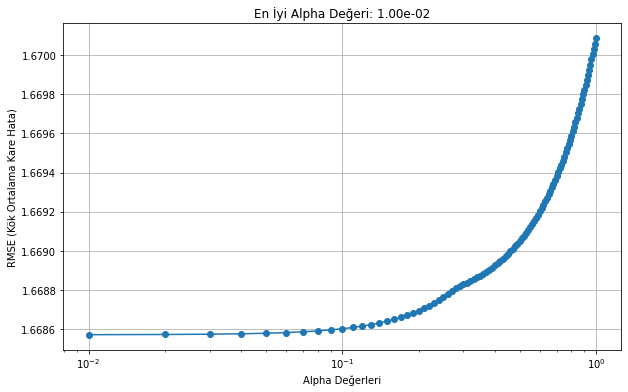

In [82]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

# -----------------------------------------------------------------

In [83]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_) 

(array([99], dtype=int64),)

In [84]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [85]:
lasso_cv_model.mse_path_

array([[2.30154971, 1.00052954, 3.09995194, 2.82542881, 1.78347009],
       [2.27241089, 0.98732363, 3.0715778 , 2.79436098, 1.75871518],
       [2.24354622, 0.97429271, 3.04348405, 2.76352248, 1.73384154],
       [2.21495512, 0.96164957, 3.01565157, 2.73293763, 1.709584  ],
       [2.18663758, 0.94912446, 2.98808001, 2.70260667, 1.68521331],
       [2.1585936 , 0.93698299, 2.96076935, 2.67252963, 1.66145044],
       [2.13082319, 0.92496319, 2.93371961, 2.64270648, 1.63758266],
       [2.10332633, 0.91332338, 2.90693077, 2.61313725, 1.61413601],
       [2.07610304, 0.90180887, 2.88040285, 2.58382192, 1.59094408],
       [2.0491533 , 0.89067073, 2.85413584, 2.55476049, 1.56800169],
       [2.02247713, 0.87966153, 2.82812973, 2.52595297, 1.54530871],
       [1.99607452, 0.86896413, 2.80238454, 2.49739936, 1.52286513],
       [1.96994547, 0.8585198 , 2.77690026, 2.46909965, 1.50067094],
       [1.94408998, 0.84832724, 2.75167688, 2.44105385, 1.47872615],
       [1.91850805, 0.83838642, 2.

In [86]:
#mse score for CV
lasso_cv_model.mse_path_[99].mean() #lasso_cv_model.mse_path_[-1].mean()

0.4118332980703248

In [87]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [88]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [89]:
pd.concat([ls, rs, rcs, lss, lcs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


In [90]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [91]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [92]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,losso_coef_alpha_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## Elastic Net


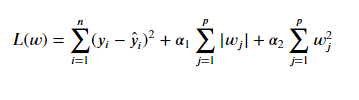
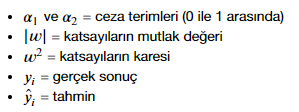

In [93]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [94]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [95]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [96]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [97]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


## For Elastic_Net CV with Deafult alpha=1 and l1_ratio = 0.5

In [98]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [99]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [100]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [101]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [102]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [103]:
em_df = pd.DataFrame(elastic_model.coef_, columns = ["elastic_coef_(apl:1) l1:0.5"])

In [104]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,losso_coef_alpha_1,lasso_cv_coef_0.01,elastic_coef_(apl:1) l1:0.5
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


## Choosing best alpha and l1_ratio values with Cross-Validation (Elastic)

In [105]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [106]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [107]:
elastic_cv_model.alpha_

0.01

In [108]:
elastic_cv_model.l1_ratio_

1.0

In [109]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [110]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [111]:
pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028


In [112]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [113]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [114]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_0.02,losso_coef_alpha_1,lasso_cv_coef_0.01,elastic_coef_(apl:1) l1:0.5,"elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


## Grid Search

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [131]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [178]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.2, 0.3, 0.4, 0.5, 1]}

In [179]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2) # verbose alttaki raporu verdi

In [180]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [181]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [135]:
grid_model.best_index_

6

In [136]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035930,0.004962,0.000870,0.000457,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.539791,-0.657249,-0.576785,-0.708383,-0.399570,-1.638928,-0.376244,-0.601610,-0.595274,-0.425547,-0.651938,0.345295,13
1,0.009796,0.001723,0.000909,0.000665,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.518583,-0.592423,-0.480625,-0.580801,-0.385799,-1.624122,-0.374793,-0.600299,-0.611076,-0.384226,-0.615274,0.348006,10
2,0.009342,0.001465,0.000554,0.000471,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.506632,-0.553304,-0.443828,-0.593608,-0.387206,-1.597737,-0.376493,-0.590761,-0.625116,-0.361170,-0.603586,0.344045,9
3,0.015132,0.003165,0.000851,0.000320,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.472517,-0.491588,-0.401791,-0.568582,-0.381791,-1.545316,-0.367510,-0.546573,-0.609835,-0.320879,-0.570638,0.337017,4
4,0.011883,0.002688,0.000857,0.000714,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.466562,-0.480210,-0.397281,-0.568033,-0.374380,-1.526817,-0.365292,-0.530107,-0.612352,-0.314264,-0.563530,0.333562,3
5,0.011699,0.002197,0.001207,0.000445,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.461979,-0.472152,-0.394203,-0.566271,-0.370321,-1.509261,-0.365930,-0.517193,-0.617914,-0.308565,-0.558379,0.329844,2
6,0.014786,0.004013,0.000811,0.000568,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.460785,-0.470107,-0.394309,-0.565259,-0.369418,-1.505231,-0.366343,-0.513941,-0.619908,-0.307172,-0.557247,0.328976,1
7,0.030016,0.004765,0.000955,0.000420,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.564014,-0.676309,-0.579356,-0.654146,-0.404673,-1.682446,-0.380824,-0.631798,-0.584191,-0.453391,-0.661115,0.354085,14
8,0.007577,0.000944,0.001210,0.000310,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.542042,-0.612985,-0.493200,-0.601674,-0.396965,-1.659388,-0.384559,-0.634095,-0.606438,-0.410972,-0.634232,0.353567,12
9,0.009276,0.001875,0.000997,0.000445,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.532774,-0.571535,-0.455889,-0.621144,-0.401885,-1.635208,-0.387602,-0.629449,-0.625790,-0.388352,-0.624963,0.349665,11


In [137]:
grid_model.best_score_

-0.5572473821214594

CV 5 iken alınan skor

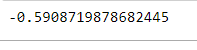

## Using Best Hyper Parameters From GridSearch

In [125]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [126]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


## Final Model

In [170]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [171]:
final_model = ElasticNet(alpha=0.01, l1_ratio=1.0) #ikiside aynı

In [172]:
#final_model = Lasso(alpha=0.01) #final_model = ElasticNet(alpha=0.01, l1_ratio=1.0) ikiside aynı

In [173]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=0.01, l1_ratio=1.0)

In [166]:
df_55th_row = sample.iloc[54].tolist()

data = [[value] for value in df_55th_row]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_values = [value[0] for value in scaled_data]

print(scaled_values)

[-0.1626531864988303, -0.16265318789248637, -0.16265318796934897, -0.16265277687125032, -0.16265314298470449, -0.16265316317651105, -0.1626531831219998, -0.16265318533564285, -0.16265318655775826, -0.16254516770599528, -0.16264134571040167, -0.1626466500979897, -0.16265188977788134, -0.1626524713019108, -0.16265279235163538, -0.16265304573198644, -0.1626531094849063, -0.1626531446818308, -0.16265316411346623, -0.1342762399934918, -0.15954220175105605, -0.16093566437043433, -0.16231212827796068, -0.16246489464049624, -0.16254923440314611, -0.16261579742137466, -0.16263254531342272, -0.16264179154549094, -0.1626468962361119, -0.162649088899602, -0.16265092498369407, -0.1626519386551199, -0.16265249828621958, -0.16265280724922251, 7.2919710700811695, 0.6546029163690439, 0.28854028625837086, -0.07305678224880621, -0.11318850568690056, -0.13534456133501516, -0.15283066622365998, -0.1572303374646844, -0.15965932262899998, -0.16100032485513252, -0.16157633755398274, -0.16205867684496678, -0.1

In [168]:
#y_pred = final_model.predict(scaled_values)

In [174]:
from sklearn.preprocessing import StandardScaler ## Hüma Hocamızın katkılarıyla

# modelimizi tanimladik
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)
final_model = Lasso(alpha = 0.01)  
final_model.fit(X_scaled, y)


sample = pd.DataFrame(poly_features)
sample.head()

df_55th_row = sample.iloc[54].tolist()

data = [[value] for value in df_55th_row]

scaled_data = final_scaler.fit_transform(data)

scaled_values_reshaped = scaled_data.reshape(1, -1)

predictions = final_model.predict(scaled_values_reshaped)

print(predictions)

[16.8732452]


In [175]:
# modelimizi tanimladik
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)
final_model = ElasticNet(alpha=0.01, l1_ratio=1.0)  
final_model.fit(X_scaled, y)


sample = pd.DataFrame(poly_features)
sample.head()

df_55th_row = sample.iloc[54].tolist()

data = [[value] for value in df_55th_row]

scaled_data = final_scaler.fit_transform(data)

scaled_values_reshaped = scaled_data.reshape(1, -1)

predictions = final_model.predict(scaled_values_reshaped)

print(predictions)

[16.8732452]


## Feature Importance with Ridge

In [149]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

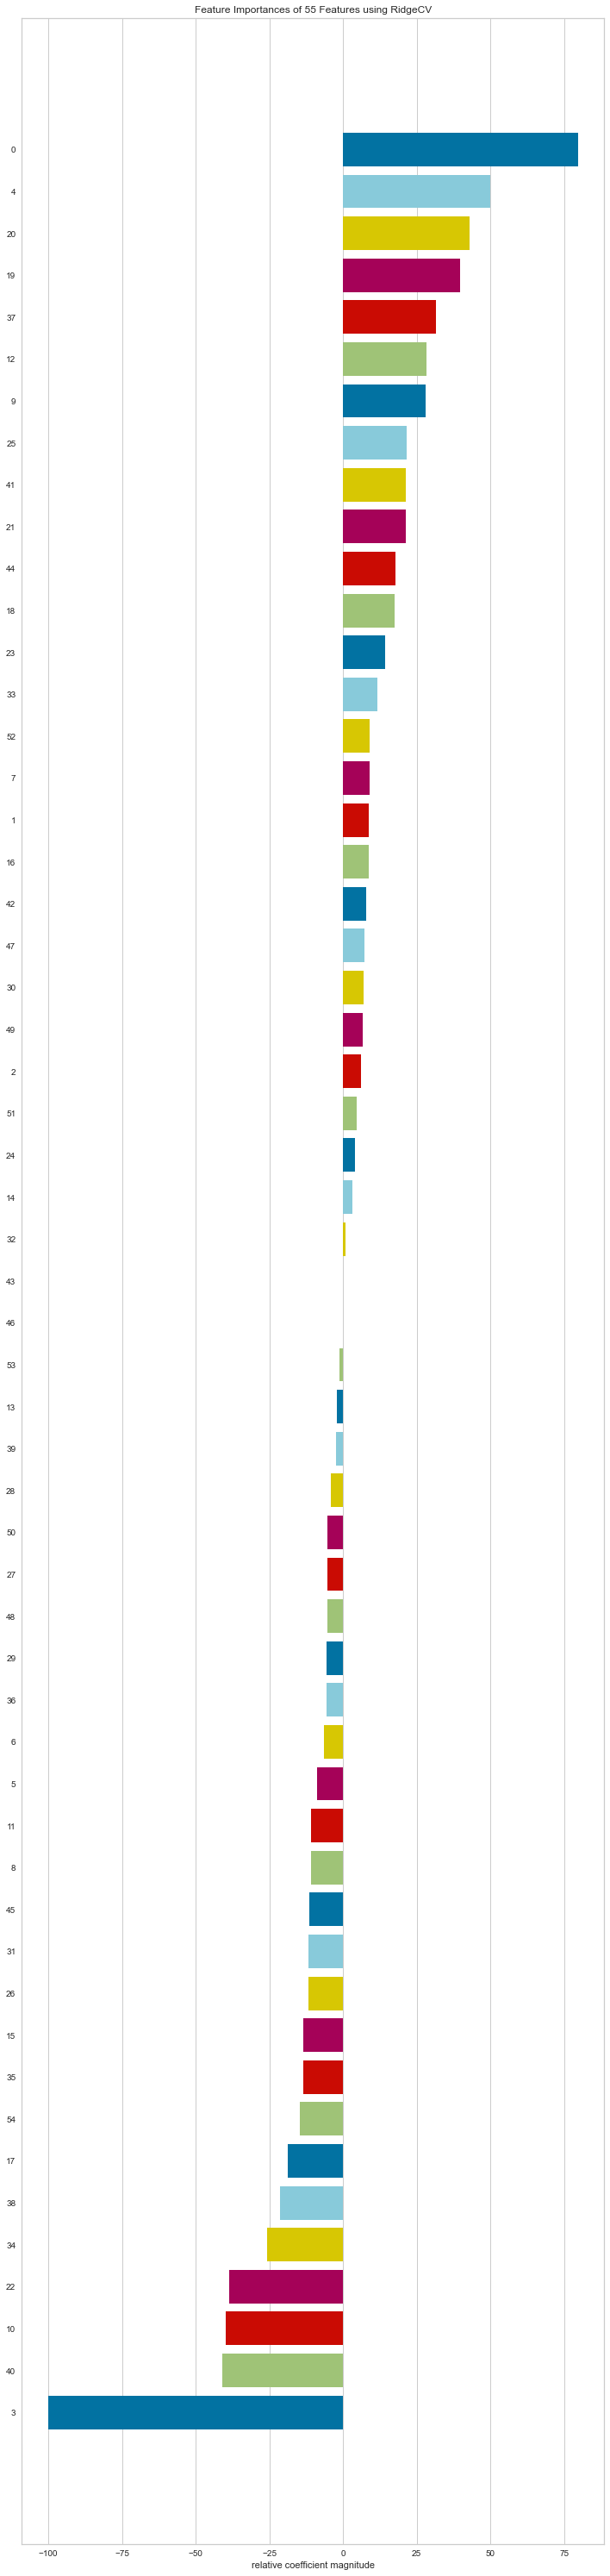

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [151]:
viz = FeatureImportances(ridge_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature Importance with Lasso

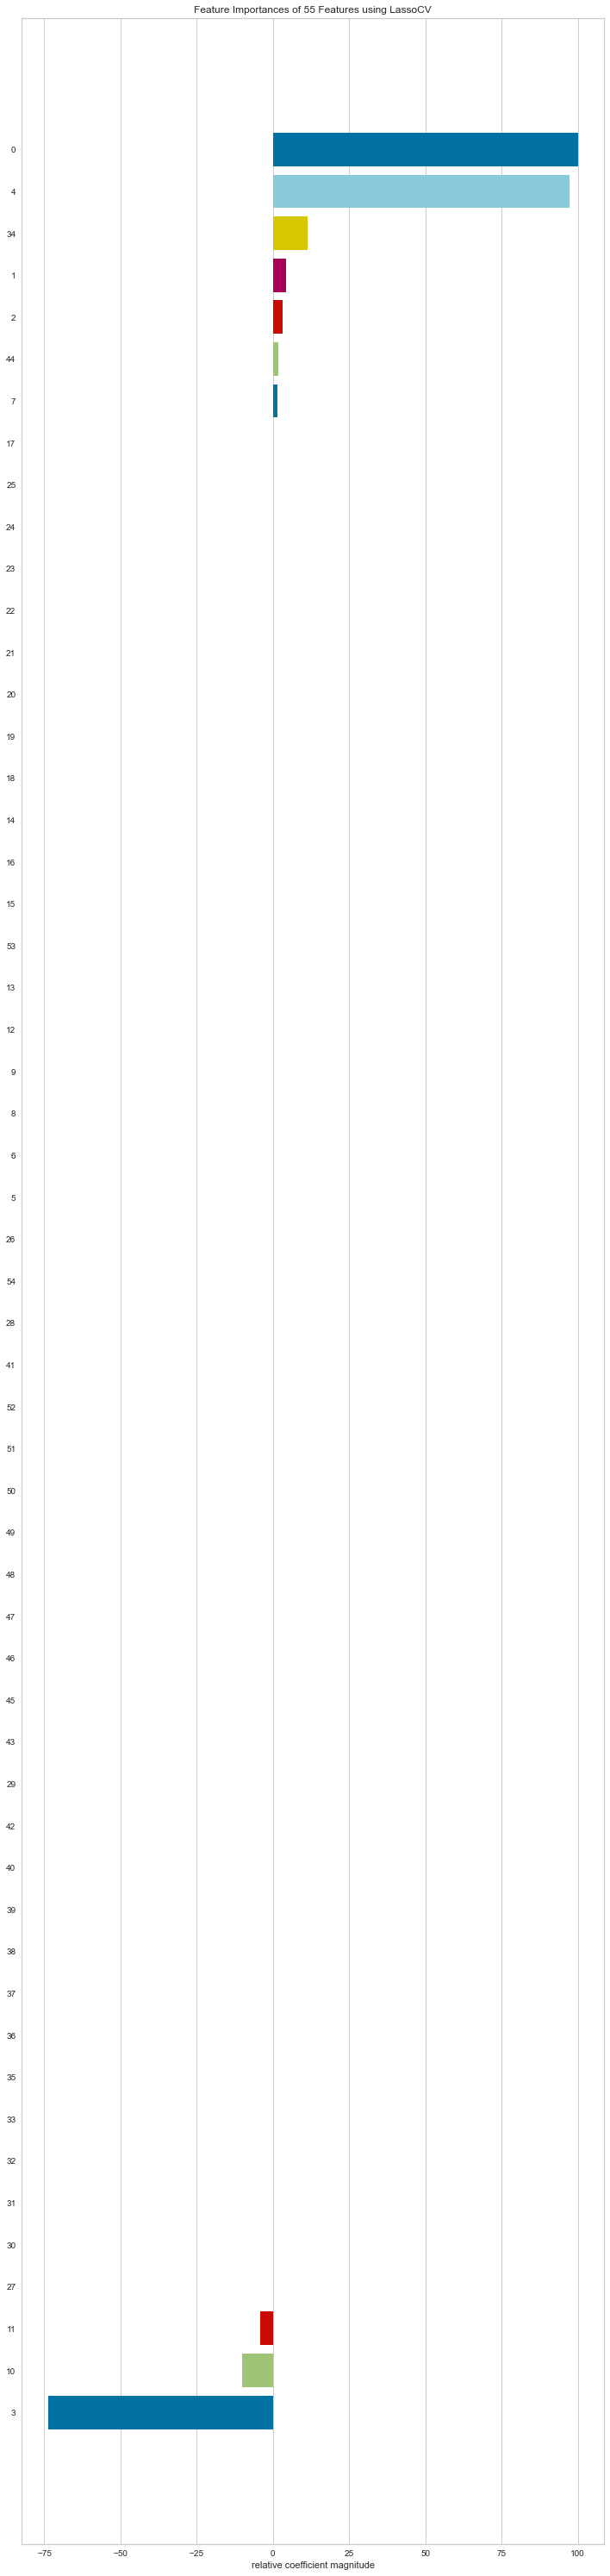

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [152]:
viz = FeatureImportances(lasso_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

# <p style="background-color:darkviolet;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Scale - Cross Validation - Regularization (Ridge, Lasso, ElasticNet) - Gridsearch</b></p>
